**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_REGION_FOLDER = "encode_open_chromatin"

## Import data

In [3]:
txt_folder = TXT_REGION_FOLDER
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.ENCSR000EKS.ENCFF274YGF.DNase.bed.gz 
K562.hg38.ENCSR000EOT.ENCFF185XRG.DNase.bed.gz 
K562.hg38.ENCSR483RKN.ENCFF558BLC.ATAC.bed.gz 
K562.hg38.ENCSR483RKN.ENCFF925CYR.ATAC.bed.gz 
K562.hg38.ENCSR868FGK.ENCFF333TAT.ATAC.bed.gz 
K562.hg38.ENCSR868FGK.ENCFF948AFM.ATAC.bed.gz 
summary 


In [4]:
txt_folder = TXT_REGION_FOLDER
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

description.tsv 
metadata.label.tsv 


**Get column names**

In [5]:
### set file path
txt_folder = TXT_REGION_FOLDER
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cname     = dat
vec_txt_cname = dat$Name
fun_display_table(head(dat))

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Name,Name given to a region; Use '.' if no name is assigned.
Score,Indicates how dark the peak will be displayed in the browser (0-1000).
Strand,+/- to denote strand or orientation. Use '.' if no orientation is assigned.


**Get metadata table**

In [6]:
### set file path
txt_folder = TXT_REGION_FOLDER
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "metadata.label.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_metadata = dat
print(dim(dat))
fun_display_table(dat)

[1] 6 3


Folder,FName,Label
encode_open_chromatin,K562.hg38.ENCSR000EKS.ENCFF274YGF.DNase.bed.gz,dnase_ENCFF274YGF
encode_open_chromatin,K562.hg38.ENCSR000EOT.ENCFF185XRG.DNase.bed.gz,dnase_ENCFF185XRG
encode_open_chromatin,K562.hg38.ENCSR483RKN.ENCFF558BLC.ATAC.bed.gz,atac_ENCFF558BLC
encode_open_chromatin,K562.hg38.ENCSR483RKN.ENCFF925CYR.ATAC.bed.gz,atac_ENCFF925CYR
encode_open_chromatin,K562.hg38.ENCSR868FGK.ENCFF333TAT.ATAC.bed.gz,atac_ENCFF333TAT
encode_open_chromatin,K562.hg38.ENCSR868FGK.ENCFF948AFM.ATAC.bed.gz,atac_ENCFF948AFM


**Import data**

In [7]:
fun_str_map_file_label = function(txt_input){
    ### setup mapping
    dat  = dat_metadata
    vec1 = dat$FName
    vec2 = dat$Label

    ### mapping string
    txt_output = fun_str_map_match(txt_input, vec1, vec2, .default=txt)
    txt_output = gsub("^dnase", "DNase", txt_output)
    txt_output = gsub("^atac",  "ATAC",  txt_output)
    
    return(txt_output)
}

In [8]:
### set directory
txt_folder = TXT_REGION_FOLDER
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fglob  = file.path(txt_fdiry, "*bed*")

### get file names and labels
vec_txt_fpath = Sys.glob(txt_fglob)
vec_txt_fname = basename(vec_txt_fpath)
vec_txt_label = fun_str_map_file_label(vec_txt_fname)

### read tables
lst = lapply(vec_txt_fpath, function(txt_fpath){
    dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_label

### assign and show
lst_dat_import = lst
print(length(lst))

[1] 6


**Check data**

In [9]:
lst = lst_dat_import
vec = names(lst)
for (txt in vec){cat(txt, "\n")}

DNase_ENCFF274YGF 
DNase_ENCFF185XRG 
ATAC_ENCFF558BLC 
ATAC_ENCFF925CYR 
ATAC_ENCFF333TAT 
ATAC_ENCFF948AFM 


In [10]:
lst = lst_dat_import
dat = lst[[1]]
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Name,Score,Strand,SignalValue,PValue,QValue,Peak
chr1,181400,181530,.,0,.,0.299874,-1,-1,75
chr1,778660,778800,.,0,.,14.138300,-1,-1,75
chr1,779137,779200,.,0,.,0.331440,-1,-1,75


In [11]:
lst = lst_dat_import
dat = lst[[2]]
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Name,Score,Strand,SignalValue,PValue,QValue,Peak
chr1,139369,139421,.,0,.,0.0872467,-1,-1,75
chr1,180800,180871,.,0,.,0.1371020,-1,-1,75
chr1,181108,181200,.,0,.,0.1246380,-1,-1,75


In [12]:
lst = lst_dat_import
dat = lst[[6]]
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Name,Score,Strand,SignalValue,PValue,QValue,Peak
chr1,42030,42399,.,839,.,4.94006,56.98604,54.92928,250
chr1,68963,70035,.,1000,.,3.99240,43.21727,41.22760,115
chr1,68963,70035,.,1000,.,6.60048,110.44444,108.21621,760


## Explore data

**Chromosome distribution (Bar plots)**

In [13]:
### count chromosomes
lst = lst_dat_import
lst = lapply(lst, function(dat){
    dat = as.data.frame(table(dat$Chrom, dnn = "Chrom"))
    return(dat)
})

### merge results
dat = bind_rows(lst, .id = "Label")
dat = dat %>% tidyr::spread(Chrom, Freq) %>% replace(is.na(.), 0)

### summarize counts to frequency
dat = dat %>%
    tidyr::gather(Chrom, Count, -Label) %>%
    dplyr::group_by(Label) %>%
    dplyr::mutate(Total = sum(Count)) %>%
    dplyr::ungroup() %>%
    dplyr::mutate(Freq = Count / Total)

### assign and show
dat_stats_chrom = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 144   5


Label,Chrom,Count,Total,Freq
ATAC_ENCFF333TAT,chr1,31171,269800,0.1155337
ATAC_ENCFF558BLC,chr1,24045,203874,0.1179405
ATAC_ENCFF925CYR,chr1,14206,123009,0.1154875
ATAC_ENCFF948AFM,chr1,20798,181340,0.1146906
DNase_ENCFF185XRG,chr1,16479,159277,0.1034613
DNase_ENCFF274YGF,chr1,12452,118721,0.1048846


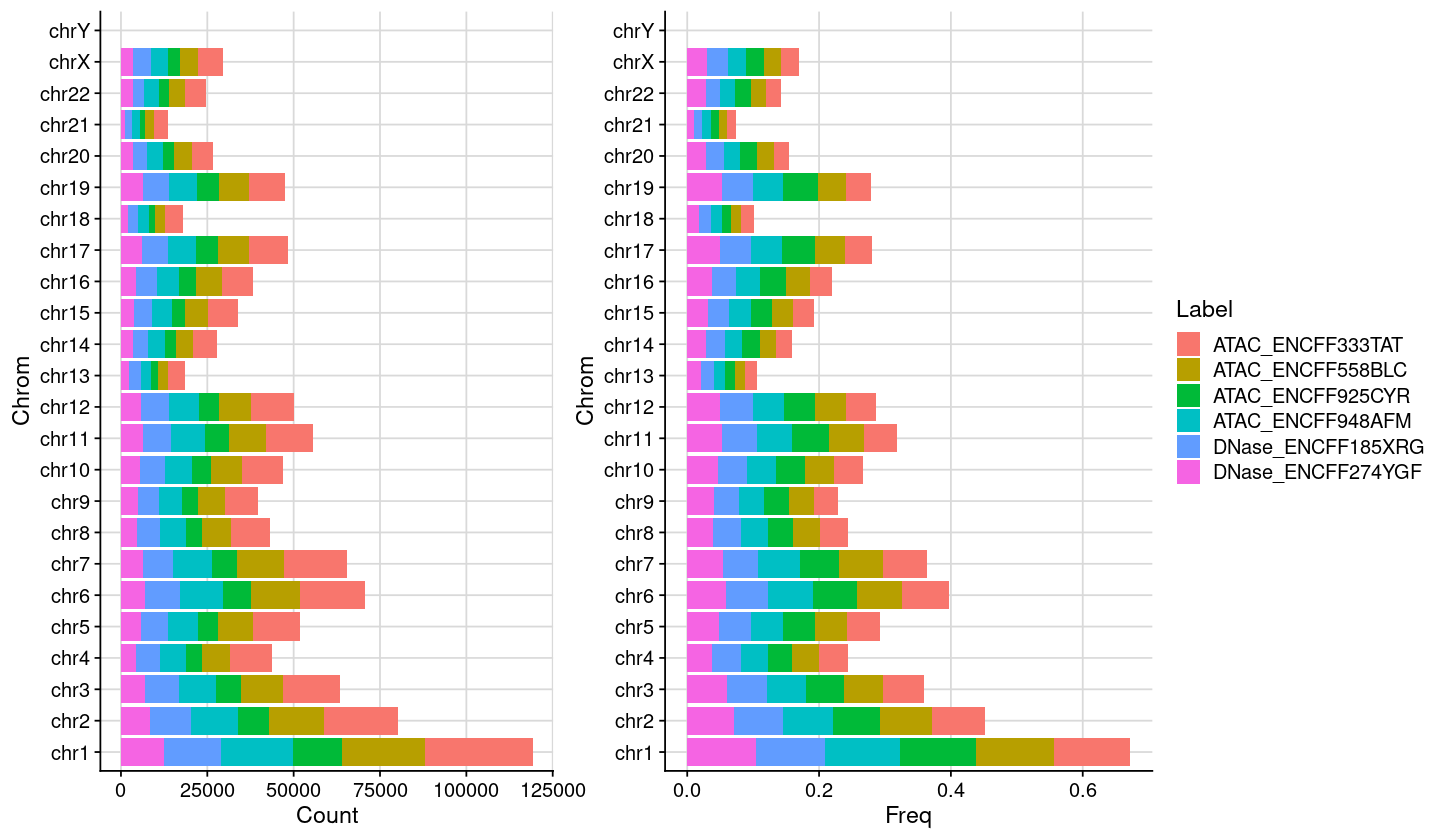

In [14]:
### set chromosome names
vec = c(1:22, "X", "Y")
vec = paste0("chr", vec)
vec_txt_chrom = vec

### set factor levels
dat = dat_stats_chrom
dat = dat %>% dplyr::mutate(Chrom = factor(Chrom, levels = vec_txt_chrom))

### plot chromosome distribution                            
gp1 = ggplot(dat, aes(x=Count, y = Chrom, fill=Label)) + 
    geom_col() + 
    theme_cowplot() + 
    background_grid() +
    theme(legend.position = "none")

### plot chromosome distribution                            
gp2 = ggplot(dat, aes(x=Freq, y = Chrom, fill=Label)) + 
    geom_col() + 
    theme_cowplot() + 
    background_grid()

### combine plot
plt = plot_grid(gp1, gp2, nrow = 1, rel_widths = c(2, 3.1))

### show plot
options(repr.plot.height=7, repr.plot.width=12)
print(plt)

**Distribution of region length (Combine)**

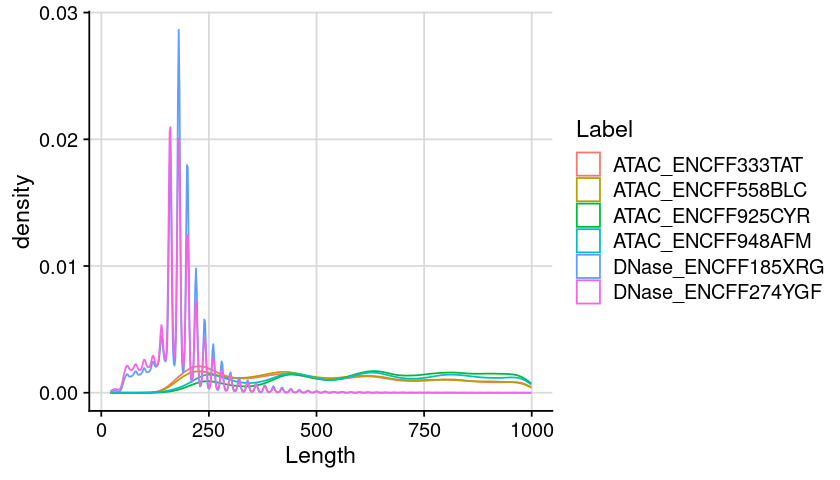

In [15]:
### arrange table for plot
lst = lst_dat_import
dat  = bind_rows(lst, .id = "Label")
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 1000)

### create plot
gpt = ggplot(dat, aes(x = Length, color = Label)) + 
    geom_density() +
    theme_cowplot() + 
    background_grid()

### show plot
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

**Distribution of region length (Split by ATAC and DNase)**

In [16]:
lst = lst_dat_import
vec = names(lst)
for(txt in vec){cat(txt, "\n")}

DNase_ENCFF274YGF 
DNase_ENCFF185XRG 
ATAC_ENCFF558BLC 
ATAC_ENCFF925CYR 
ATAC_ENCFF333TAT 
ATAC_ENCFF948AFM 


In [17]:
### split data frame into ATAC and DNase
lst = lst_dat_import
df1 = bind_rows(lst[1:2], .id = "Label")
df2 = bind_rows(lst[3:6], .id = "Label")
df1 = df1 %>% dplyr::mutate(Group = "DNase")
df2 = df2 %>% dplyr::mutate(Group = "ATAC")

### assign
dat_region_dnase = df1
dat_region_atac  = df2

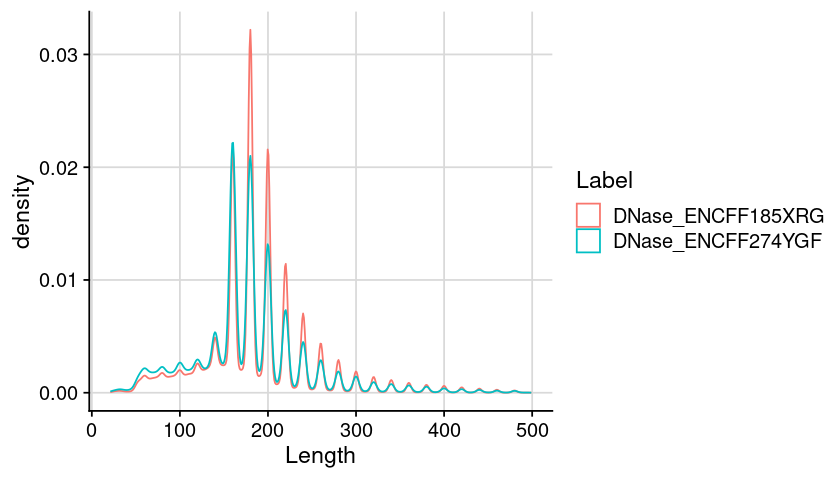

In [18]:
### arrange table for plot
dat = dat_region_dnase
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 500)

### create plot
gpt = ggplot(dat, aes(x = Length, color = Label)) + 
    geom_density() +
    theme_cowplot() + 
    background_grid()

### show plot
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

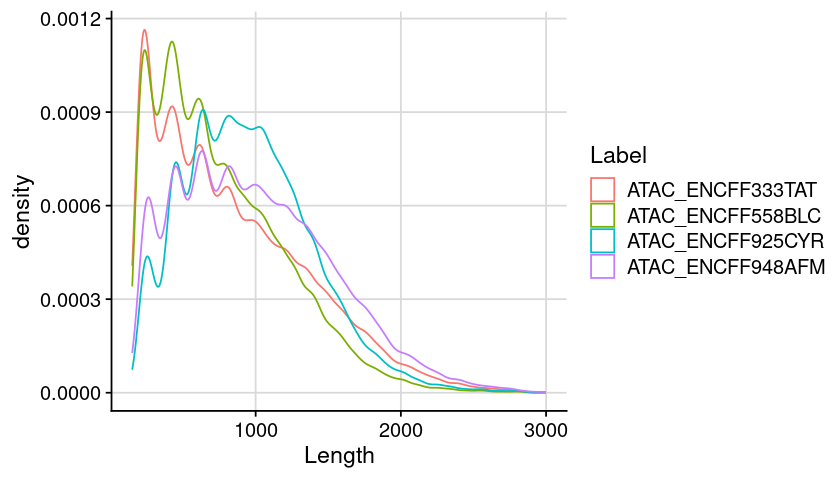

In [19]:
### arrange table for plot
dat = dat_region_atac
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 3000)

### create plot
gpt = ggplot(dat, aes(x = Length, color = Label)) + 
    geom_density() +
    theme_cowplot() + 
    background_grid()

### show plot
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

## Save figures

In [20]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 14)
)

**ENCODE OCR (ATAC)**

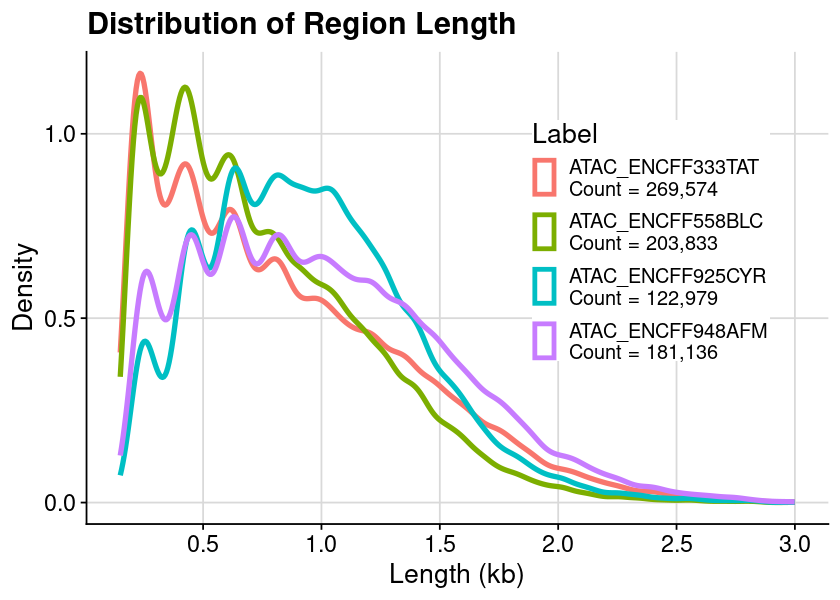

In [21]:
### arrange table for plot
dat = dat_region_atac
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 3000)
dat_region_arrange = dat

### summarize the number of regions (total)
dat = dat_region_arrange
vec = dat %>%
    group_by(Label) %>%
    summarise(Count = n(), .groups="drop") %>%
    dplyr::mutate(
        line1 = Label,
        line2 = paste("Count =", scales::comma(Count)),
        combined = paste0(line1, "\n", line2)
    ) %>%
    { set_names(.$combined, .$Label) }
vec_txt_label = vec

### create plot
dat = dat_region_arrange
gpt = ggplot(dat, aes(x = Length/1000, colour = Label)) +
    geom_density(linewidth = 1.5) +
    scale_x_continuous(breaks = seq(0, 3, by = 0.5)) +
    scale_y_continuous(breaks = c(0, 0.5, 1.0, 1.5)) +
    scale_color_discrete(
        ### replace each original level by our multi‐line version
        labels = vec_txt_label
    ) +
    labs(x = "Length (kb)", y = "Density", title = "Distribution of Region Length") +
    theme_cowplot() + 
    background_grid() +
    theme_text +
    theme(
        legend.position = "inside", 
        legend.position.inside = c(0.6, 0.6),
        legend.background = element_rect(fill = "white"),
        legend.key.spacing.y = unit(0.3, 'cm')
    )

### assign plot
gpt_density_length_atac = gpt

### show plot
options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

**ENCODE OCR (DNase)**

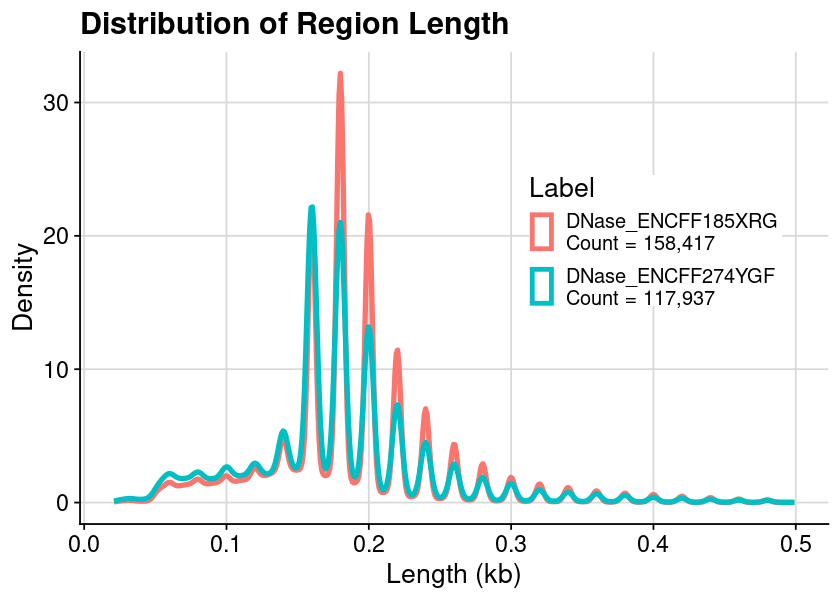

In [22]:
### arrange table for plot
dat = dat_region_dnase
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 500)
dat_region_arrange = dat

### summarize the number of regions (total)
dat = dat_region_arrange
vec = dat %>%
    group_by(Label) %>%
    summarise(Count = n(), .groups="drop") %>%
    dplyr::mutate(
        line1 = Label,
        line2 = paste("Count =", scales::comma(Count)),
        combined = paste0(line1, "\n", line2)
    ) %>%
    { set_names(.$combined, .$Label) }
vec_txt_label = vec

### create plot
dat = dat_region_arrange
gpt = ggplot(dat, aes(x = Length/1000, colour = Label)) +
    geom_density(linewidth = 1.5) +
    scale_x_continuous(breaks = seq(0, 0.5, by = 0.1)) +
    #scale_y_continuous(breaks = c(0, 0.5, 1.0)) +
    scale_color_discrete(
        ### replace each original level by our multi‐line version
        labels = vec_txt_label
    ) +
    labs(x = "Length (kb)", y = "Density", title = "Distribution of Region Length") +
    theme_cowplot() + 
    background_grid() +
    theme_text +
    theme(
        legend.position = "inside", 
        legend.position.inside = c(0.6, 0.6),
        legend.background = element_rect(fill = "white"),
        legend.key.spacing.y = unit(0.3, 'cm')
    )

### assign plot
gpt_density_length_dnase = gpt

### show plot
options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

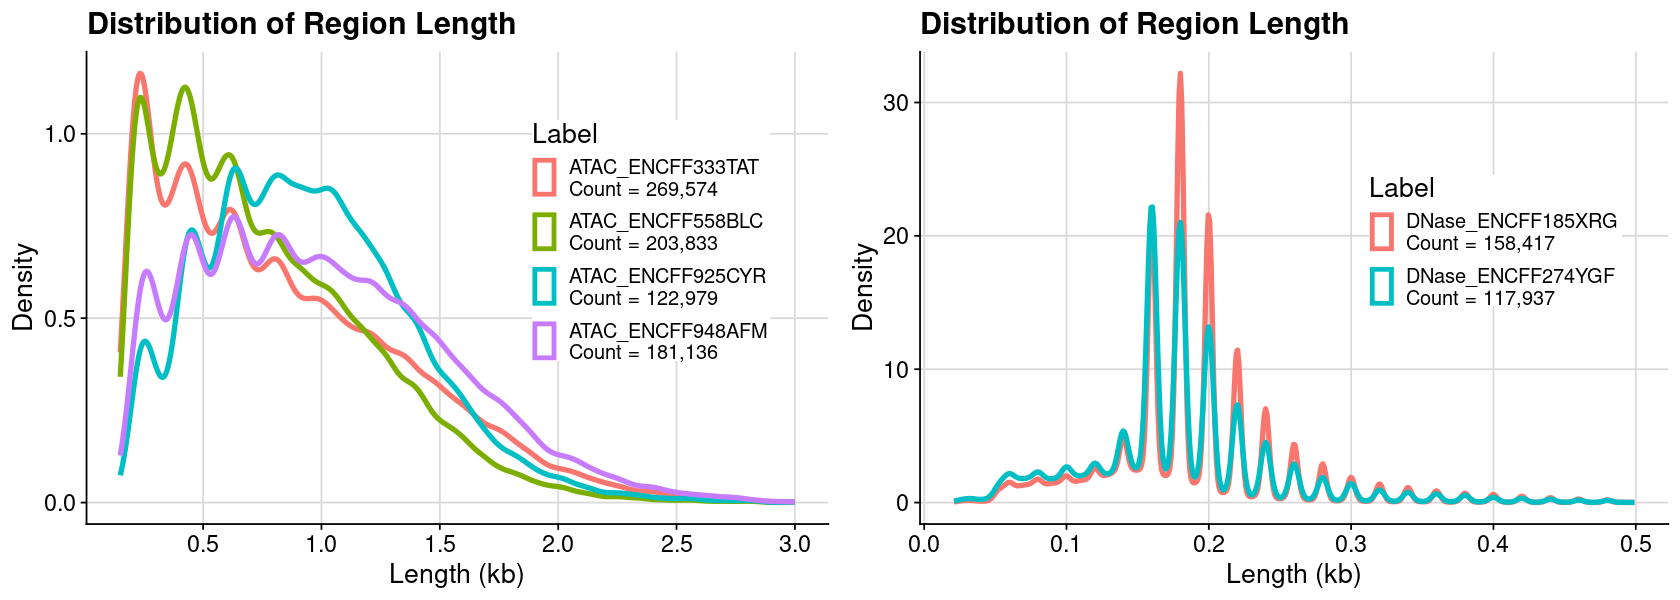

In [23]:
### combine plot
plt = plot_grid(
    gpt_density_length_atac, 
    gpt_density_length_dnase,
    nrow = 1
)
plt_export = plt

### show plot
options(repr.plot.height=5, repr.plot.width=14)
print(plt)

In [25]:
txt_fdiry = "./"
txt_fname = "fig.region.encode_ocr.distribution.region_length.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 14, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.encode_ocr.distribution.region_length.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 14, units = "in")